In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive', timeout_ms=60000)

Mounted at /content/drive


7/7 [==============================] - 43s 6s/step
Feature values for a sample image in the training set:
[3.608961  0.6548115 0.        ... 0.        0.        0.       ]
Accuracy: 0.995


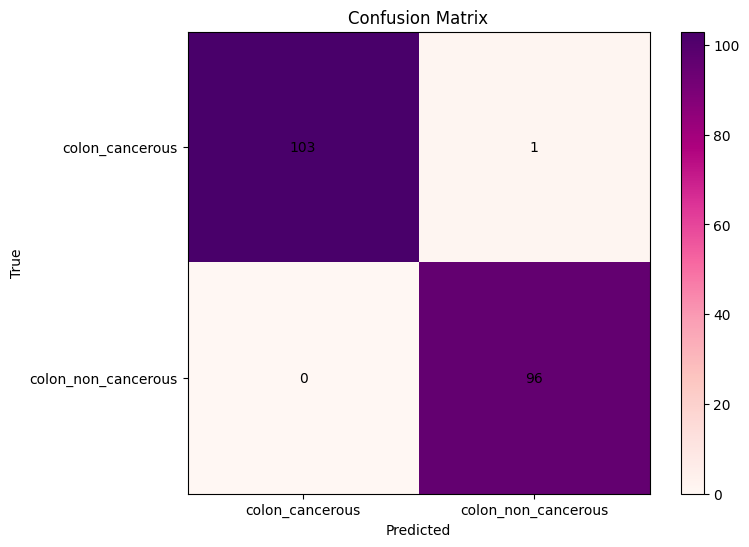

Overall Precision: 0.9896907216494846
Overall Recall: 1.0
Overall F1 Score: 0.9948186528497409


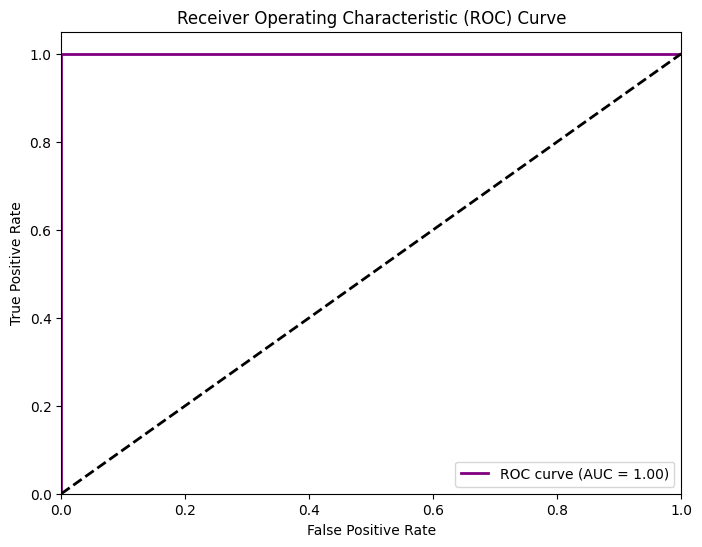

In [1]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Step 1: Load and preprocess images using CNN (ResNet50 in this example)
cancerous_folder = "/content/drive/MyDrive/Hybrid_Dataset_2500/Colon_aca"
non_cancerous_folder = "/content/drive/MyDrive/Hybrid_Dataset_2500/Colon_n"

cancerous_images, cancerous_labels = load_and_preprocess_images(cancerous_folder, 1)
non_cancerous_images, non_cancerous_labels = load_and_preprocess_images(non_cancerous_folder, 0)

# Combine cancerous and non-cancerous data
all_images = np.concatenate((cancerous_images, non_cancerous_images), axis=0)
all_labels = np.concatenate((cancerous_labels, non_cancerous_labels), axis=0)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Step 3: Train CNN (ResNet50 in this example) and extract features
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

X_train_features = base_model.predict(X_train)
X_test_features = base_model.predict(X_test)

# Flatten the features
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

sample_index = 0  # Change this index to view features for a different image
sample_features = X_train_features_flat[sample_index]

print("Feature values for a sample image in the training set:")
print(sample_features)

# Step 4: Train SVM on extracted features
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_features_flat, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test_features_flat)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix with values
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion Matrix')
plt.colorbar()

class_names = ['colon_cancerous', 'colon_non_cancerous']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted')
plt.ylabel('True')

# Print numerical values inside the matrix
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='black')

plt.show()

# Calculate Precision, Recall, Sensitivity, and F1 Score for the overall model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1 Score:", f1)

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = svm_model.predict_proba(X_test_features_flat)

# Compute ROC curve and ROC area
fpr, tpr, roc_auc = roc_curve(y_test_bin, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


13/13 [==============================] - 73s 6s/step
Feature values for a sample image in the training set:
[0.         0.         0.         ... 0.5235019  0.61028475 0.02549458]
Accuracy: 0.9925


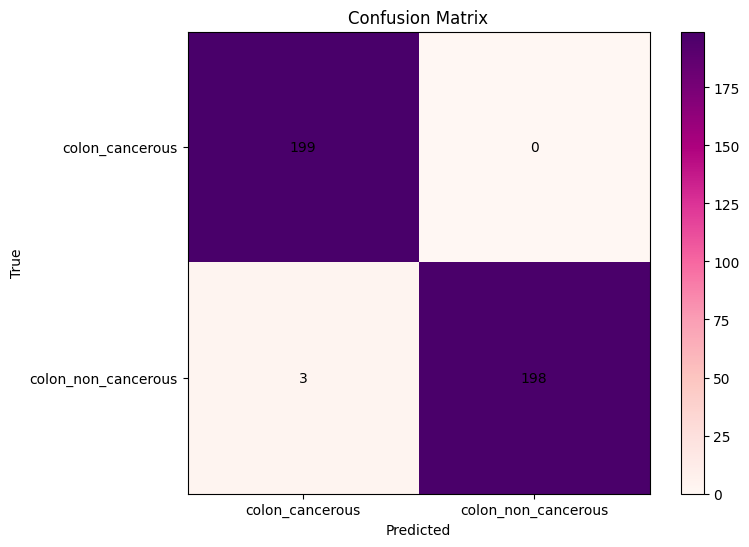

Overall Precision: 1.0
Overall Recall: 0.9850746268656716
Overall F1 Score: 0.9924812030075187


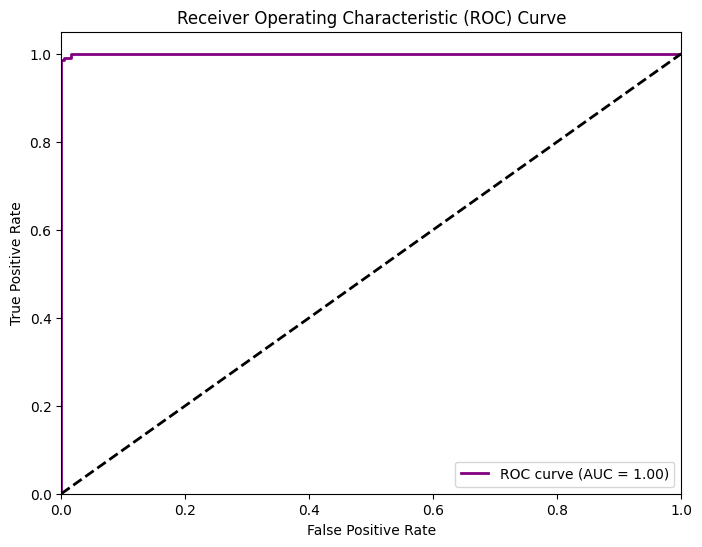

In [5]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Step 1: Load and preprocess images using CNN (DenseNet121 in this example)
colon_cancerous_folder = "/content/drive/MyDrive/Colon_aca"
colon_non_cancerous_folder = "/content/drive/MyDrive/Colon_n"

# Load and preprocess images for each class
colon_cancerous_images, colon_cancerous_labels = load_and_preprocess_images(colon_cancerous_folder, 0)
colon_non_cancerous_images, colon_non_cancerous_labels = load_and_preprocess_images(colon_non_cancerous_folder, 1)

# Combine data from both classes
all_images = np.concatenate((colon_cancerous_images, colon_non_cancerous_images), axis=0)
all_labels = np.concatenate((colon_cancerous_labels, colon_non_cancerous_labels), axis=0)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Step 3: Train CNN (DenseNet121 in this example) and extract features
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

X_train_features = base_model.predict(X_train)
X_test_features = base_model.predict(X_test)

# Flatten the features
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

sample_index = 0  # Change this index to view features for a different image
sample_features = X_train_features_flat[sample_index]

print("Feature values for a sample image in the training set:")
print(sample_features)

# Step 4: Train SVM on extracted features with RBF kernel for binary classification
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_features_flat, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test_features_flat)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix with values
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion Matrix')
plt.colorbar()

class_names = ['colon_cancerous', 'colon_non_cancerous']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted')
plt.ylabel('True')

# Print numerical values inside the matrix
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='black')

plt.show()

# Calculate Precision, Recall, Sensitivity, and F1 Score for the overall model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1 Score:", f1)

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = svm_model.predict_proba(X_test_features_flat)

# Compute ROC curve and ROC area
fpr, tpr, roc_auc = roc_curve(y_test_bin, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


10/10 [==============================] - 51s 5s/step
Feature values for a sample image in the training set:
[0.00099305 0.01323092 0.         ... 0.08811486 0.         0.        ]
Accuracy: 0.9633333333333334


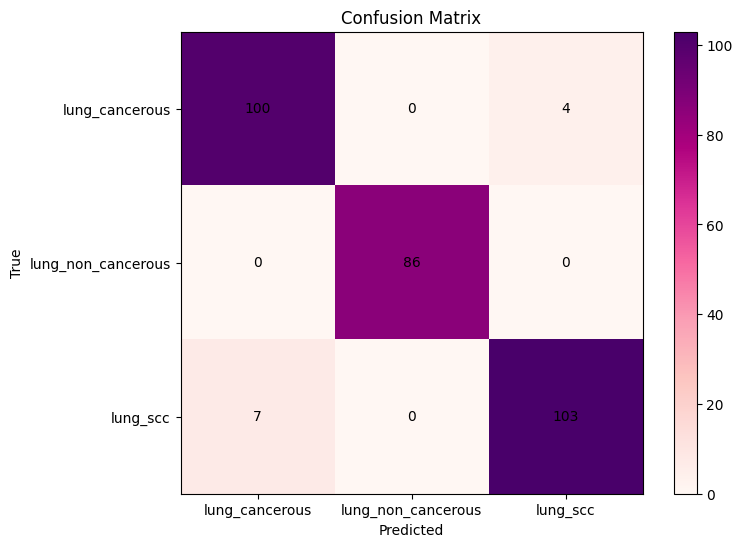

Overall Precision: 0.9636137071651092
Overall Recall: 0.9633333333333334
Overall F1 Score: 0.9633405406192442


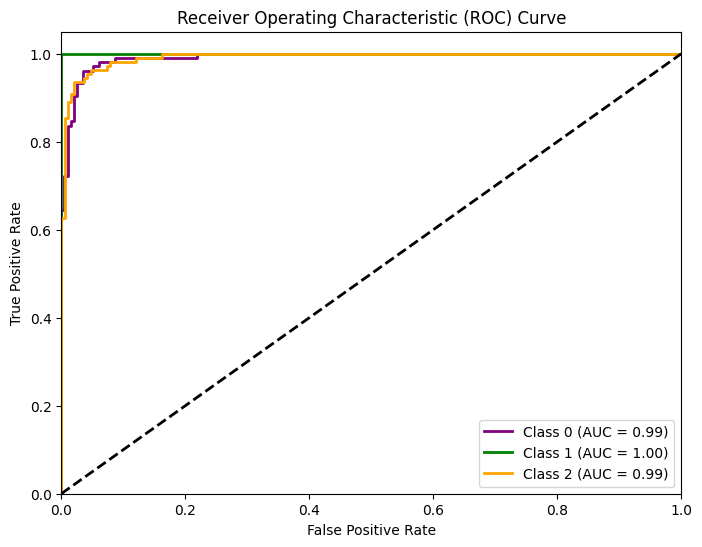

In [3]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Step 1: Load and preprocess images using CNN (DenseNet121 in this example)
lung_cancerous_folder = "/content/drive/MyDrive/Hybrid_Dataset_2500/Lung_aca"
lung_non_cancerous_folder = "/content/drive/MyDrive/Hybrid_Dataset_2500/Lung_n"
lung_scc_folder = "/content/drive/MyDrive/Hybrid_Dataset_2500/Lung_scc"

# Load and preprocess images for each class
lung_cancerous_images, lung_cancerous_labels = load_and_preprocess_images(lung_cancerous_folder, 0)
lung_non_cancerous_images, lung_non_cancerous_labels = load_and_preprocess_images(lung_non_cancerous_folder, 1)
lung_scc_images, lung_scc_labels = load_and_preprocess_images(lung_scc_folder, 2)

# Combine data from all classes
all_images = np.concatenate((lung_cancerous_images, lung_non_cancerous_images, lung_scc_images), axis=0)
all_labels = np.concatenate((lung_cancerous_labels, lung_non_cancerous_labels, lung_scc_labels), axis=0)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Step 3: Train CNN (DenseNet121 in this example) and extract features
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

X_train_features = base_model.predict(X_train)
X_test_features = base_model.predict(X_test)

# Flatten the features
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

sample_index = 0  # Change this index to view features for a different image
sample_features = X_train_features_flat[sample_index]

print("Feature values for a sample image in the training set:")
print(sample_features)

# Step 4: Train SVM on extracted features with RBF kernel for multiclass
svm_model = SVC(kernel='rbf', decision_function_shape='ovr',probability=True)  # 'ovr' stands for 'one-vs-rest'
svm_model.fit(X_train_features_flat, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test_features_flat)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix with values
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion Matrix')
plt.colorbar()

class_names = ['lung_cancerous', 'lung_non_cancerous', 'lung_scc']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted')
plt.ylabel('True')

# Print numerical values inside the matrix
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='black')

plt.show()

# Calculate Precision, Recall, Sensitivity, and F1 Score for the overall model
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1 Score:", f1)

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = svm_model.predict_proba(X_test_features_flat)

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(3):  # For 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = cycle(['purple', 'green', 'orange'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

10/10 [==============================] - 59s 6s/step
Feature values for a sample image in the training set:
[0.2083463  0.         0.         ... 0.         0.50589705 0.        ]
Accuracy: 0.9533333333333334


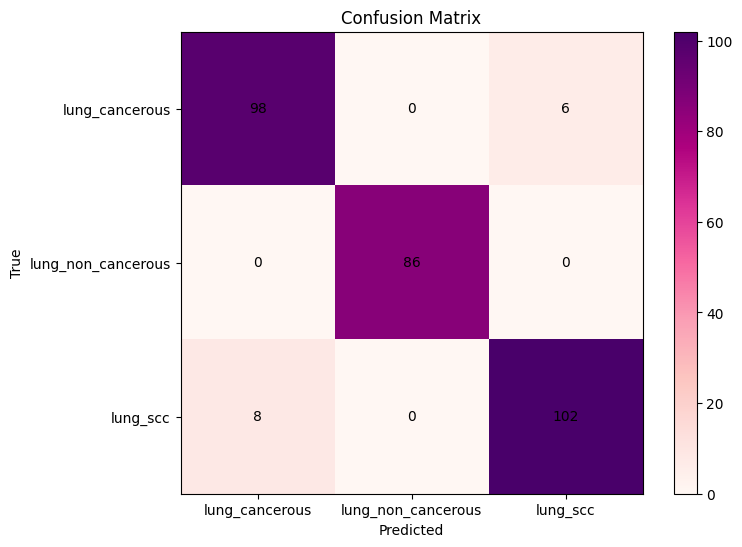

Overall Precision: 0.9534661076170509
Overall Recall: 0.9533333333333334
Overall F1 Score: 0.9533414882772682


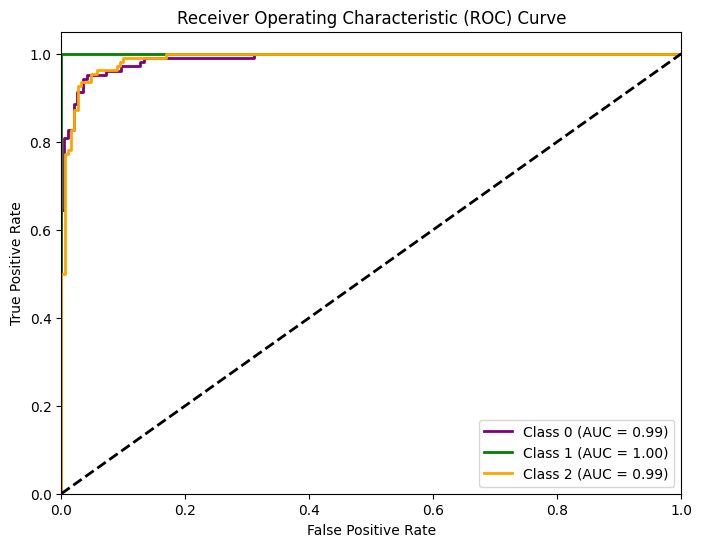

In [1]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Step 1: Load and preprocess images using CNN (ResNet50 in this example)
lung_cancerous_folder = "/content/drive/MyDrive/Hybrid_Dataset_2500/Lung_aca"
lung_non_cancerous_folder = "/content/drive/MyDrive/Hybrid_Dataset_2500/Lung_n"
lung_scc_folder = "/content/drive/MyDrive/Hybrid_Dataset_2500/Lung_scc"

# Load and preprocess images for each class
lung_cancerous_images, lung_cancerous_labels = load_and_preprocess_images(lung_cancerous_folder, 0)
lung_non_cancerous_images, lung_non_cancerous_labels = load_and_preprocess_images(lung_non_cancerous_folder, 1)
lung_scc_images, lung_scc_labels = load_and_preprocess_images(lung_scc_folder, 2)

# Combine data from all classes
all_images = np.concatenate((lung_cancerous_images, lung_non_cancerous_images, lung_scc_images), axis=0)
all_labels = np.concatenate((lung_cancerous_labels, lung_non_cancerous_labels, lung_scc_labels), axis=0)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Step 3: Train CNN (ResNet50 in this example) and extract features
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Preprocess the training and testing sets
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

X_train_features = base_model.predict(X_train)
X_test_features = base_model.predict(X_test)

# Flatten the features
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

sample_index = 0  # Change this index to view features for a different image
sample_features = X_train_features_flat[sample_index]

print("Feature values for a sample image in the training set:")
print(sample_features)

# Step 4: Train SVM on extracted features with RBF kernel
svm_model = SVC(kernel='rbf', probability=True)  # 'rbf' stands for radial basis function
svm_model.fit(X_train_features_flat, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test_features_flat)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix with values
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion Matrix')
plt.colorbar()

class_names = ['lung_cancerous', 'lung_non_cancerous', 'lung_scc']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted')
plt.ylabel('True')

# Print numerical values inside the matrix
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='black')

plt.show()

# Calculate Precision, Recall, Sensitivity, and F1 Score for the overall model
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1 Score:", f1)

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = svm_model.predict_proba(X_test_features_flat)

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(3):  # For 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = cycle(['purple', 'green', 'orange'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array_resnet = resnet_preprocess_input(img_array.copy())
        img_array_densenet = densenet_preprocess_input(img_array.copy())
        images.append((img_array_resnet, img_array_densenet))
        labels.append(label)
    return np.array(images), np.array(labels)

# Step 1: Load and preprocess images using ResNet50 and DenseNet201
lung_cancerous_folder = "/content/drive/MyDrive/Hybrid_Dataset_2500/Lung_aca"
lung_non_cancerous_folder = "/content/drive/MyDrive/Hybrid_Dataset_2500/Lung_n"
lung_scc_folder = "/content/drive/MyDrive/Hybrid_Dataset_2500/Lung_scc"

# Load and preprocess images for each class
lung_cancerous_images, lung_cancerous_labels = load_and_preprocess_images(lung_cancerous_folder, 0)
lung_non_cancerous_images, lung_non_cancerous_labels = load_and_preprocess_images(lung_non_cancerous_folder, 1)
lung_scc_images, lung_scc_labels = load_and_preprocess_images(lung_scc_folder, 2)

# Combine data from all classes
all_images_resnet = np.concatenate((lung_cancerous_images[:, 0], lung_non_cancerous_images[:, 0], lung_scc_images[:, 0]), axis=0)
all_images_densenet = np.concatenate((lung_cancerous_images[:, 1], lung_non_cancerous_images[:, 1], lung_scc_images[:, 1]), axis=0)
all_labels = np.concatenate((lung_cancerous_labels, lung_non_cancerous_labels, lung_scc_labels), axis=0)

# Step 2: Split the dataset into training and testing sets
X_train_resnet, X_test_resnet, X_train_densenet, X_test_densenet, y_train, y_test = train_test_split(
    all_images_resnet, all_images_densenet, all_labels, test_size=0.2, random_state=42
)

# Step 3: Train ResNet50 and DenseNet201 and extract features
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Preprocess the training and testing sets
X_train_resnet_preprocessed = resnet_preprocess_input(X_train_resnet.copy())
X_test_resnet_preprocessed = resnet_preprocess_input(X_test_resnet.copy())
X_train_densenet_preprocessed = densenet_preprocess_input(X_train_densenet.copy())
X_test_densenet_preprocessed = densenet_preprocess_input(X_test_densenet.copy())

X_train_features_resnet = resnet_model.predict(X_train_resnet_preprocessed)
X_test_features_resnet = resnet_model.predict(X_test_resnet_preprocessed)

X_train_features_densenet = densenet_model.predict(X_train_densenet_preprocessed)
X_test_features_densenet = densenet_model.predict(X_test_densenet_preprocessed)

# Flatten the features
X_train_features_flat_resnet = X_train_features_resnet.reshape(X_train_features_resnet.shape[0], -1)
X_test_features_flat_resnet = X_test_features_resnet.reshape(X_test_features_resnet.shape[0], -1)
X_train_features_flat_densenet = X_train_features_densenet.reshape(X_train_features_densenet.shape[0], -1)
X_test_features_flat_densenet = X_test_features_densenet.reshape(X_test_features_densenet.shape[0], -1)

# Concatenate features from both networks
X_train_features_concat = np.concatenate((X_train_features_flat_resnet, X_train_features_flat_densenet), axis=1)
X_test_features_concat = np.concatenate((X_test_features_flat_resnet, X_test_features_flat_densenet), axis=1)

# Step 4: Train SVM on concatenated features with RBF kernel
svm_model = SVC(kernel='rbf', probability=True)  # Set probability=True for ROC curve later
svm_model.fit(X_train_features_concat, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test_features_concat)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix with values
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion Matrix')
plt.colorbar()

class_names = ['lung_cancerous', 'lung_non_cancerous', 'lung_scc']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted')
plt.ylabel('True')

# Print numerical values inside the matrix
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='black')

plt.show()
